In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Chicago_crimes1.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Hour,Month,Weekday
0,0,24761,JC444497,2019-09-22 23:52:00,030XX N KIMBALL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,...,21538.0,22.0,55.0,12.0,39.0,7.0,168.0,23,9,7
1,1,11837612,JC444514,2019-09-22 23:45:00,004XX W 111TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,...,21861.0,45.0,525.0,22.0,19.0,9.0,258.0,23,9,7
2,2,11838692,JC444512,2019-09-22 23:45:00,039XX W MONTROSE AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,...,21538.0,16.0,117.0,38.0,39.0,1.0,9.0,23,9,7
3,3,11837693,JC444507,2019-09-22 23:42:00,064XX S LAFLIN ST,0810,THEFT,OVER $500,RESIDENCE,False,...,22257.0,65.0,279.0,2.0,23.0,17.0,204.0,23,9,7
4,4,11837630,JC444521,2019-09-22 23:40:00,024XX E 79TH ST,2016,NARCOTICS,MANU/DELIVER:PCP,STREET,True,...,21202.0,39.0,246.0,37.0,24.0,19.0,225.0,23,9,7


In [4]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Year'] = pd.to_datetime(df['Year'])

### Creating dataframes for the 6 types of crime I want to analyse

In [7]:
df_theft1=df[df['Primary Type']=='THEFT']

In [8]:
df_narc = df[df['Primary Type']=='NARCOTICS']

In [9]:
df_assault = df[df['Primary Type']=='ASSAULT']

In [10]:
df_burg = df[df['Primary Type']=='BURGLARY']

In [11]:
df_rob = df[df['Primary Type']=='ROBBERY']


#### **************************************THEFT DATA SET************************************************** #


In [12]:
df.dtypes

Unnamed: 0                         int64
ID                                 int64
Case Number                       object
Date                      datetime64[ns]
Block                             object
IUCR                              object
Primary Type                      object
Description                       object
Location Description              object
Arrest                              bool
Domestic                            bool
Beat                               int64
District                         float64
FBI Code                          object
X Coordinate                     float64
Y Coordinate                     float64
Year                      datetime64[ns]
Updated On                        object
Latitude                         float64
Longitude                        float64
Location                          object
Zip Codes                        float64
Community Areas                  float64
Census Tracts                    float64
Wards           

In [13]:
df_theft1 = df_theft1[['Date', 'Primary Type', 'Month',
                       'Weekday']].groupby('Date').agg({'Primary Type':'count',
                                                        'Month':'sum','Weekday':'sum'}).reset_index()

In [14]:
df_theft1['Month']=df_theft1['Month']/df_theft1['Primary Type']
df_theft1['Weekday']=df_theft1['Weekday']/df_theft1['Primary Type']


In [15]:
df_theft1=pd.get_dummies(data=df_theft1, columns=['Weekday','Month'], drop_first=True)
df_theft1['time'] = df_theft1.index+1

In [16]:
df_theft1['const']=1


#### **************************************NARCOTICS DATA SET************************************************** #


In [17]:
df_narc = df_narc[['Date', 'Primary Type', 'Month',
                       'Weekday']].groupby('Date').agg({'Primary Type':'count', 'Month':'sum','Weekday':'sum'}).reset_index()

In [18]:
df_narc['Month']=df_narc['Month']/df_narc['Primary Type']
df_narc['Weekday']=df_narc['Weekday']/df_narc['Primary Type']

In [19]:
df_narc=pd.get_dummies(data=df_narc, columns=['Weekday','Month'], drop_first=True)
df_narc['time'] = df_narc.index+1

In [20]:
df_narc['const']=1


##### **************************************ASSAULT DATA SET************************************************** #


In [21]:
df_assault = df_assault[['Date', 'Primary Type', 'Month',
                       'Weekday']].groupby('Date').agg({'Primary Type':'count', 'Month':'sum','Weekday':'sum'}).reset_index()

In [22]:
df_assault['Month']=df_assault['Month']/df_assault['Primary Type']
df_assault['Weekday']=df_assault['Weekday']/df_assault['Primary Type']

In [23]:
df_assault=pd.get_dummies(data=df_assault, columns=['Weekday','Month'], drop_first=True)
df_assault['time'] = df_assault.index+1

In [24]:
df_assault['const']=1


#### **************************************BURGLARY DATA SET************************************************** #


In [25]:
df_burg = df_burg[['Date', 'Primary Type', 'Month',
                       'Weekday']].groupby('Date').agg({'Primary Type':'count', 'Month':'sum','Weekday':'sum'}).reset_index()

In [26]:
df_burg['Month']=df_burg['Month']/df_burg['Primary Type']
df_burg['Weekday']=df_burg['Weekday']/df_burg['Primary Type']

In [27]:
df_burg=pd.get_dummies(data=df_burg, columns=['Weekday','Month'], drop_first=True)
df_burg['time'] = df_burg.index+1

In [28]:
df_burg['const']=1

#### **ROBBERY DATA SET**

In [29]:
df_rob = df_rob[['Date', 'Primary Type', 'Month',
                       'Weekday']].groupby('Date').agg({'Primary Type':'count', 'Month':'sum','Weekday':'sum'}).reset_index()

In [30]:
df_rob['Month']=df_rob['Month']/df_rob['Primary Type']
df_rob['Weekday']=df_rob['Weekday']/df_rob['Primary Type']

In [31]:
df_rob=pd.get_dummies(data=df_rob, columns=['Weekday','Month'], drop_first=True)
df_rob['time'] = df_rob.index+1

In [32]:
df_rob['const']=1





# TIME SERIES ANALYSIS


## Theft

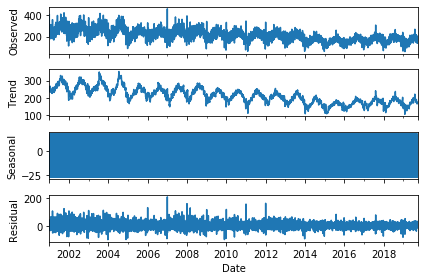

<Figure size 432x288 with 0 Axes>

In [116]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(df_theft1.set_index('Date')['Primary Type'])
resplot = res.plot()
plt.show()
plt.savefig('theft1.png')

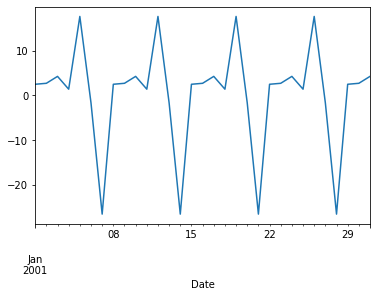

In [117]:
res.seasonal.iloc[:31].plot()
plt.savefig('theft2.png')

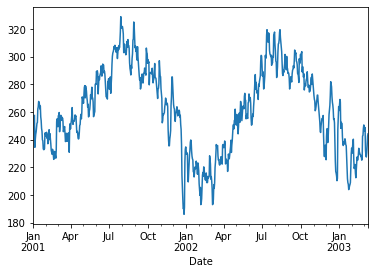

In [118]:
res.trend.iloc[:800].plot()
plt.savefig('theft3.png')

In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [40]:
from statsmodels.tsa.stattools import adfuller

print("P-value: ")
print(adfuller(df_theft1['Primary Type'])[1])

P-value: 
0.030625827247447904


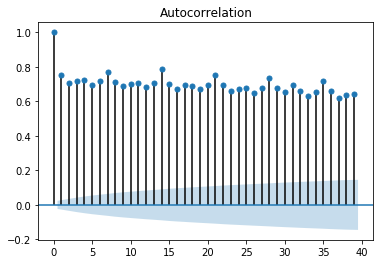

In [79]:
plot_acf(df_theft1['Primary Type'])
plt.show()

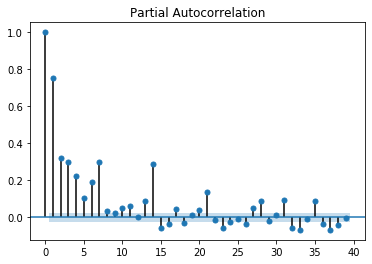

In [80]:
plot_pacf(df_theft1['Primary Type'])
plt.show()

In [35]:
y=df_theft1['Primary Type']
X=df_theft1.drop(['Primary Type', 'Date','Weekday_2.0','Weekday_4.0'],axis=1)

In [36]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Primary Type   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1056.
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:29:19   Log-Likelihood:                -32309.
No. Observations:                6839   AIC:                         6.465e+04
Df Residuals:                    6822   BIC:                         6.477e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Weekday_3.0     1.9577      1.008      1.942      0.052      -0.018       3.934
Weekday_5.0    15.4048      1.008     15.281      0.000      13.429      17.381
Weekday_6.0    -3.9023      1.008     -3.871      0.000      -5.879      -1.926
Weekday_7.0   -28.8487      1.008    -28.617      0.000     -30.825     -26.873
Month_2.0     -11.5716      1.629     -7.104      0.000     -14.765      -8.378
Month_3.0       3.3140      1.590      2.084      0.037       0.197       6.431
Month_4.0      15.7125      1.603      9.799      0.000      12.569      18.856
Month_5.0      27.5445      1.590     17.321      0.000      24.427      30.662
Month_6.0      43.3140      1.604     27.011      0.000      40.171      46.457
Month_7.0      60.1437      1.590     37.816      0.000      57.026      63.261
Month_8.0      60.5038      1.591     38.040      0.000      57.386      63.622
Month_9.0      46.8087      1.609     29.083      0.000      43.654      49.964
Month_10.0     41.0801      1.612     25.482      0.000      37.920      44.240
Month_11.0     24.2118      1.626     14.891      0.000      21.024      27.399
Month_12.0      8.9944      1.612      5.579      0.000       5.834      12.155
time           -0.0176      0.000   -105.161      0.000      -0.018      -0.017
const         247.0250      1.308    188.791      0.000     244.460     249.590
==============================================================================
Omnibus:                      855.328   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4943.764
Skew:                           0.455   Prob(JB):                         0.00
Kurtosis:                       7.065   Cond. No.                     4.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

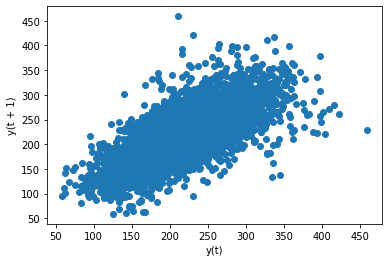

In [37]:
# Checking for autocorrelation

from pandas.plotting import lag_plot

lag_plot(df_theft1['Primary Type'])

In [38]:
from statsmodels.tsa.ar_model import AR

train, test = df_theft1['Primary Type'][:-10], df_theft1['Primary Type'][-10:]
model = AR(df_theft1['Primary Type'])
model_fit = model.fit(maxlag=1)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [39]:
print(model_fit.params)

const              52.091995
L1.Primary Type     0.753634
dtype: float64


## Narcotics

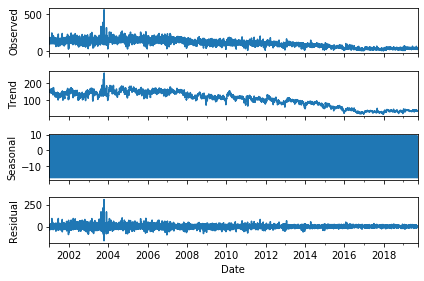

In [41]:
res = sm.tsa.seasonal_decompose(df_narc.set_index('Date')['Primary Type'])
resplot = res.plot()
plt.show()



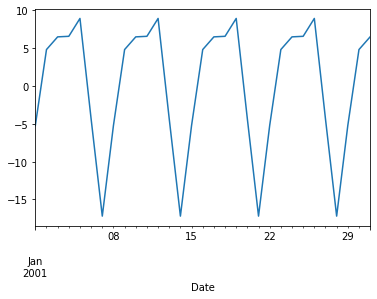

In [42]:
res.seasonal.iloc[:31].plot()

In [43]:
print("P-value: ")
print(adfuller(df_narc['Primary Type'])[1])

P-value: 
0.4751030198677021


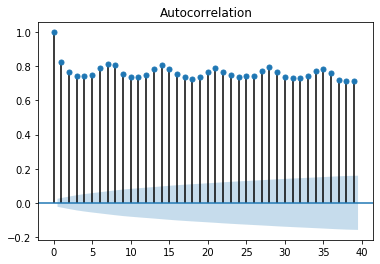

In [45]:
plot_acf(df_narc['Primary Type'])
plt.show()

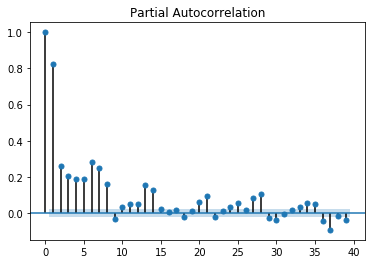

In [46]:
plot_pacf(df_narc['Primary Type'])
plt.show()

In [47]:
y=df_narc['Primary Type']
X=df_narc.drop(['Primary Type', 'Date', 'Weekday_6.0', 'Month_5.0', 
                'Month_10.0', 'Month_11.0', 'Month_7.0', 'Month_9.0'],axis=1)

sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Primary Type   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1254.
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:29:21   Log-Likelihood:                -32469.
No. Observations:                6839   AIC:                         6.496e+04
Df Residuals:                    6826   BIC:                         6.505e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Weekday_2.0     9.6342      1.094      8.803      0.000       7.489      11.780
Weekday_3.0    11.2604      1.094     10.289      0.000       9.115      13.406
Weekday_4.0    11.3546      1.094     10.375      0.000       9.209      13.500
Weekday_5.0    13.7146      1.094     12.532      0.000      11.569      15.860
Weekday_7.0   -12.3717      1.094    -11.305      0.000     -14.517     -10.226
Month_2.0       7.2781      1.297      5.610      0.000       4.735       9.821
Month_3.0       7.2759      1.246      5.840      0.000       4.834       9.718
Month_4.0       2.4055      1.263      1.904      0.057      -0.071       4.882
Month_6.0      -3.3530      1.263     -2.654      0.008      -5.830      -0.876
Month_8.0       2.7785      1.246      2.230      0.026       0.336       5.221
Month_12.0    -11.6451      1.275     -9.133      0.000     -14.144      -9.146
time           -0.0203      0.000   -118.915      0.000      -0.021      -0.020
const         168.5059      0.925    182.105      0.000     166.692     170.320
==============================================================================
Omnibus:                     2046.996   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45349.788
Skew:                           0.905   Prob(JB):                         0.00
Kurtosis:                      15.485   Cond. No.                     2.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

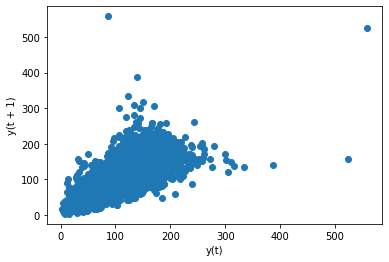

In [100]:
# Checking for autocorrelation

lag_plot(df_narc['Primary Type'])
plt.savefig('fig.png')

<Figure size 432x288 with 0 Axes>

In [88]:
train, test = df_narc['Primary Type'][:-10], df_narc['Primary Type'][-10:]
model = AR(df_narc['Primary Type'])
model_fit = model.fit(maxlag=6)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [89]:
print(model_fit.params)

const              4.873388
L1.Primary Type    0.428567
L2.Primary Type    0.063204
L3.Primary Type    0.057707
L4.Primary Type    0.065461
L5.Primary Type    0.051734
L6.Primary Type    0.285992
dtype: float64


In [93]:
import statsmodels.api as sm

In [95]:
model=sm.tsa.statespace.SARIMAX(endog=df_narc['Primary Type'],order=(6,0,6),seasonal_order=(0,0,1,30),trend='ct',enforce_invertibility=False)

In [96]:
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Primary Type   No. Observations:                 6839
Model:             SARIMAX(6, 0, 6)x(0, 0, 1, 30)   Log Likelihood              -31120.770
Date:                            Fri, 04 Oct 2019   AIC                          62273.540
Time:                                    12:44:22   BIC                          62382.827
Sample:                                         0   HQIC                         62311.243
                                           - 6839                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.8201      5.791      3.422      0.001       8.470      31.170
drift         -0.0024      0.001   

In [97]:
model=sm.tsa.statespace.SARIMAX(endog=df_narc['Primary Type'],order=(6,0,6),seasonal_order=(0,0,0,7),trend='ct',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:           Primary Type   No. Observations:                 6839
Model:               SARIMAX(6, 0, 6)   Log Likelihood              -31124.730
Date:                Fri, 04 Oct 2019   AIC                          62279.460
Time:                        12:46:32   BIC                          62381.916
Sample:                             0   HQIC                         62314.806
                               - 6839                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.8205     10.960      1.808      0.071      -1.661      41.302
drift         -0.0024      0.001     -1.808      0.071      -0.005       0.000
ar.L1          0.5785      1.026      0.564      0.5

## Assault

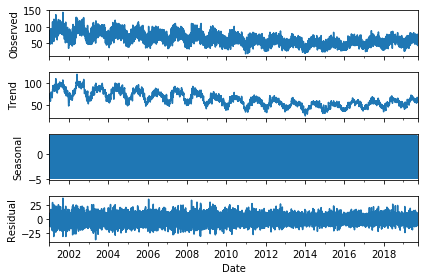

<Figure size 432x288 with 0 Axes>

In [104]:
res = sm.tsa.seasonal_decompose(df_assault.set_index('Date')['Primary Type'])
resplot = res.plot()
plt.show()
plt.savefig('ass1.png')

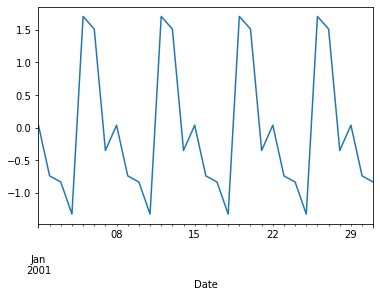

In [111]:
res.seasonal.iloc[:31].plot()
plt.savefig('ass2.png')



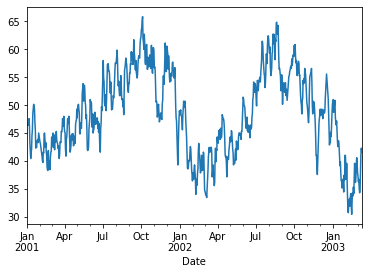

In [112]:
res.trend.iloc[:800].plot()
plt.savefig('ass3.png')

In [57]:
print("P-value: ")
print(adfuller(df_assault['Primary Type'])[1])

P-value: 
0.020063483043030097


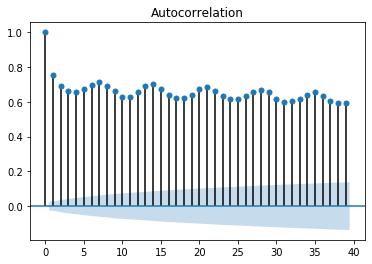

In [76]:
plot_acf(df_assault['Primary Type'])
plt.show()

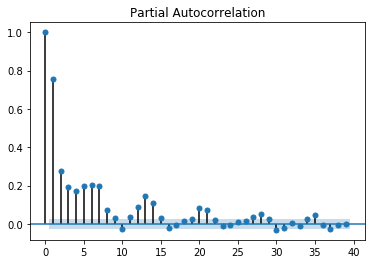

In [77]:
plot_pacf(df_assault['Primary Type'])
plt.show()

In [53]:
y=df_assault['Primary Type']
X=df_assault.drop(['Primary Type', 'Date', 'Month_12.0', 'Weekday_5.0'],axis=1)

sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Primary Type   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     634.6
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:29:23   Log-Likelihood:                -26558.
No. Observations:                6839   AIC:                         5.315e+04
Df Residuals:                    6822   BIC:                         5.327e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Weekday_2.0     1.7098      0.461      3.707      0.000       0.806       2.614
Weekday_3.0     2.8674      0.461      6.217      0.000       1.963       3.772
Weekday_4.0     1.0205      0.461      2.213      0.027       0.116       1.925
Weekday_6.0    -4.7082      0.461    -10.209      0.000      -5.612      -3.804
Weekday_7.0    -5.3428      0.461    -11.585      0.000      -6.247      -4.439
Month_2.0       2.9615      0.616      4.809      0.000       1.754       4.169
Month_3.0      11.4599      0.597     19.207      0.000      10.290      12.630
Month_4.0      14.6706      0.603     24.322      0.000      13.488      15.853
Month_5.0      22.1433      0.597     37.112      0.000      20.974      23.313
Month_6.0      21.9762      0.603     36.431      0.000      20.794      23.159
Month_7.0      20.5696      0.597     34.472      0.000      19.400      21.739
Month_8.0      18.4517      0.597     30.921      0.000      17.282      19.622
Month_9.0      19.2895      0.606     31.825      0.000      18.101      20.478
Month_10.0     13.0092      0.608     21.414      0.000      11.818      14.200
Month_11.0      5.0154      0.614      8.164      0.000       3.811       6.220
time           -0.0059   7.21e-05    -81.493      0.000      -0.006      -0.006
const          71.4361      0.480    148.700      0.000      70.494      72.378
==============================================================================
Omnibus:                       30.514   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.883
Skew:                           0.164   Prob(JB):                     1.97e-07
Kurtosis:                       2.973   Cond. No.                     3.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

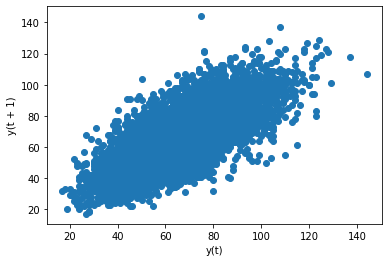

In [54]:
# Checking for autocorrelation
lag_plot(df_assault['Primary Type'])

In [55]:
train, test = df_assault['Primary Type'][:-10], df_assault['Primary Type'][-10:]
model = AR(df_assault['Primary Type'])
model_fit = model.fit(maxlag=1)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [56]:
print(model_fit.params)

const              15.389747
L1.Primary Type     0.756761
dtype: float64


## Burglary

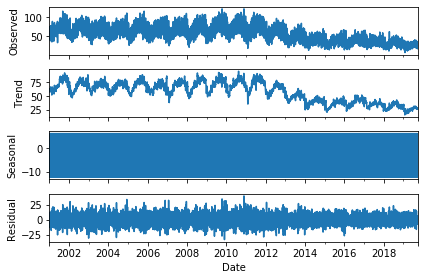

In [58]:
res = sm.tsa.seasonal_decompose(df_burg.set_index('Date')['Primary Type'])
resplot = res.plot()
plt.show()


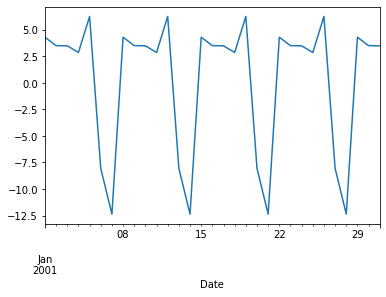

In [59]:
res.seasonal.iloc[:31].plot()

In [60]:
y=df_burg['Primary Type']
X=df_burg.drop(['Primary Type', 'Date','Weekday_2.0', 'Weekday_3.0', 'Month_4.0'],axis=1)

sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Primary Type   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     705.2
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:29:26   Log-Likelihood:                -27310.
No. Observations:                6839   AIC:                         5.465e+04
Df Residuals:                    6823   BIC:                         5.476e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Weekday_4.0    -0.8940      0.485     -1.842      0.066      -1.845       0.057
Weekday_5.0     2.4805      0.485      5.111      0.000       1.529       3.432
Weekday_6.0   -11.8056      0.485    -24.324      0.000     -12.757     -10.854
Weekday_7.0   -16.1122      0.485    -33.198      0.000     -17.064     -15.161
Month_2.0      -7.3829      0.686    -10.758      0.000      -8.728      -6.038
Month_3.0      -3.7105      0.665     -5.581      0.000      -5.014      -2.407
Month_5.0       5.2966      0.665      7.967      0.000       3.993       6.600
Month_6.0       8.0592      0.672     11.990      0.000       6.742       9.377
Month_7.0      11.8779      0.665     17.865      0.000      10.575      13.181
Month_8.0      13.6099      0.665     20.468      0.000      12.306      14.913
Month_9.0      13.1327      0.675     19.444      0.000      11.809      14.457
Month_10.0     13.2617      0.677     19.591      0.000      11.935      14.589
Month_11.0     11.3658      0.685     16.604      0.000      10.024      12.708
Month_12.0      7.1258      0.677     10.526      0.000       5.799       8.453
time           -0.0068   8.05e-05    -84.479      0.000      -0.007      -0.007
const          78.5113      0.505    155.579      0.000      77.522      79.501
==============================================================================
Omnibus:                      234.563   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.463
Skew:                           0.468   Prob(JB):                     7.51e-57
Kurtosis:                       3.179   Cond. No.                     3.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

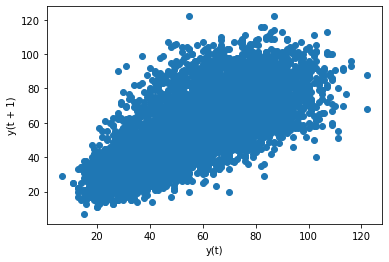

In [61]:
# Checking for autocorrelation
lag_plot(df_burg['Primary Type'])

In [62]:
train, test = df_burg['Primary Type'][:-10], df_burg['Primary Type'][-10:]
model = AR(df_burg['Primary Type'])
model_fit = model.fit(maxlag=1)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [63]:
print(model_fit.params)

const              14.686021
L1.Primary Type     0.744752
dtype: float64


In [64]:
print("P-value: ")
print(adfuller(df_burg['Primary Type'])[1])

P-value: 
0.3216279537358549


## Robbery

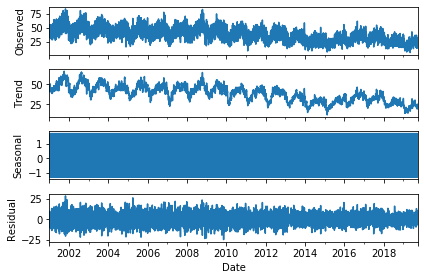

<Figure size 432x288 with 0 Axes>

In [121]:
res = sm.tsa.seasonal_decompose(df_rob.set_index('Date')['Primary Type'])
resplot = res.plot()
plt.show()
plt.savefig('rob1.png')

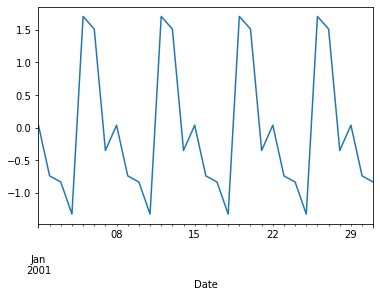

In [122]:
res.seasonal.iloc[:31].plot()

plt.savefig('rob2.png')


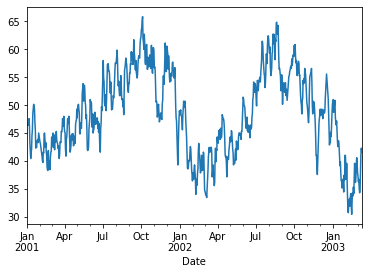

In [123]:
res.trend.iloc[:800].plot()
plt.savefig('rob3.png')

In [72]:
print("P-value: ")
print(adfuller(df_rob['Primary Type'])[1])

P-value: 
0.0048632349848863


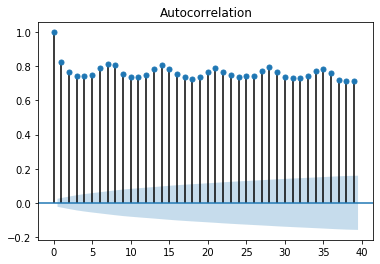

In [84]:
plot_acf(df_narc['Primary Type'])
plt.show()

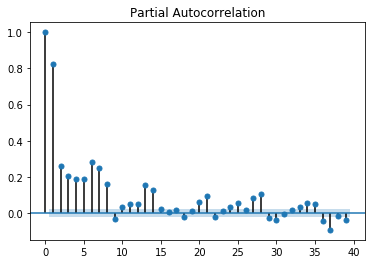

In [85]:
plot_pacf(df_narc['Primary Type'])
plt.show()

In [68]:
y=df_rob['Primary Type']
X=df_rob.drop(['Primary Type', 'Date', 'Weekday_7.0'],axis=1)

sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Primary Type   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     489.2
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:29:29   Log-Likelihood:                -23922.
No. Observations:                6839   AIC:                         4.788e+04
Df Residuals:                    6821   BIC:                         4.800e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Weekday_2.0    -0.6004      0.314     -1.914      0.056      -1.215       0.015
Weekday_3.0    -0.6783      0.314     -2.162      0.031      -1.293      -0.063
Weekday_4.0    -1.1649      0.314     -3.713      0.000      -1.780      -0.550
Weekday_5.0     1.8642      0.314      5.942      0.000       1.249       2.479
Weekday_6.0     1.6796      0.314      5.353      0.000       1.065       2.295
Month_2.0      -6.9463      0.478    -14.533      0.000      -7.883      -6.009
Month_3.0      -4.2573      0.467     -9.124      0.000      -5.172      -3.343
Month_4.0      -1.7446      0.470     -3.708      0.000      -2.667      -0.822
Month_5.0       1.6647      0.467      3.568      0.000       0.750       2.579
Month_6.0       3.8970      0.471      8.282      0.000       2.975       4.819
Month_7.0       7.0563      0.467     15.121      0.000       6.142       7.971
Month_8.0       7.4235      0.467     15.906      0.000       6.509       8.338
Month_9.0       6.6071      0.472     13.991      0.000       5.681       7.533
Month_10.0      8.0452      0.473     17.007      0.000       7.118       8.973
Month_11.0      5.8126      0.477     12.184      0.000       4.877       6.748
Month_12.0      5.1006      0.473     10.782      0.000       4.173       6.028
time           -0.0038   4.91e-05    -77.369      0.000      -0.004      -0.004
const          48.1334      0.398    120.827      0.000      47.353      48.914
==============================================================================
Omnibus:                       74.786   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.894
Skew:                           0.231   Prob(JB):                     4.48e-18
Kurtosis:                       3.260   Cond. No.                     4.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

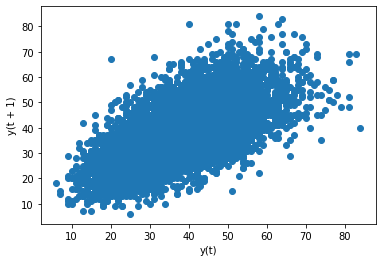

In [69]:
# Checking for autocorrelation
lag_plot(df_rob['Primary Type'])

In [70]:
train, test = df_rob['Primary Type'][:-10], df_rob['Primary Type'][-10:]
model = AR(df_rob['Primary Type'])
model_fit = model.fit(maxlag=1)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [71]:
print(model_fit.params)

const              12.872640
L1.Primary Type     0.661568
dtype: float64
